In [1]:
# Here we import 3 tranches of data from
#   https://wfhmap.com/data/
# to explore the dataset.
# One of the Excel files was only available after signing up. The other one was free to download.
# I've created .csv's (from Excel) for the relevant tranches of data for our purposes.

In [2]:
1

1

In [3]:
!pwd

/Users/darbs2/Desktop/US_residuals


In [4]:
import sys
print(sys.executable)
print(sys.version)

/Users/darbs2/Desktop/US_residuals/v_env/bin/python
3.10.13 (main, Aug 24 2023, 22:36:46) [Clang 14.0.3 (clang-1403.0.22.14.1)]


## Packages

In [5]:
import pandas as pd

In [6]:
pd.set_option("display.max_columns", 80)

In [7]:
import math
from datetime import datetime
import re
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline    
from matplotlib.pyplot import rcParams
plt.style.use('ggplot')
from datetime import date, timedelta, datetime

In [9]:
from residuals_functions import *

## Tranche 1:
## Monthly occupation-level statistics (2-digit US 2010 SOC codes) for the United States

In [8]:
df = pd.read_csv('SOC.csv')  

In [9]:
df

,year,month,year_month,us_soc_major_group_2digits,us_soc_major_group_name,percent,n,measurement
0,2019,Jan,2019.000000,11,Management Occupations,5.07,322224,1 Month Average
1,2019,Feb,2019.083333,11,Management Occupations,5.43,305380,1 Month Average
2,2019,Mar,2019.166667,11,Management Occupations,4.94,321828,1 Month Average
3,2019,Apr,2019.250000,11,Management Occupations,5.59,292722,1 Month Average
4,2019,May,2019.333333,11,Management Occupations,4.87,340378,1 Month Average
...,...,...,...,...,...,...,...,...
1168,2022,Nov,2022.833333,55,Military Specific Occupations,6.52,1504,1 Month Average
1169,2022,Dec,2022.916667,55,Military Specific Occupations,8.07,892,1 Month Average
1170,2023,Jan,2023.000000,55,Military Specific Occupations,8.31,902,1 Month Average
1171,2023,Feb,2023.083333,55,Military Specific Occupations,8.06,980,1 Month Average


In [15]:
df.us_soc_major_group_2digits.value_counts().sort_index(ascending=True)

us_soc_major_group_2digits
11    51
13    51
15    51
17    51
19    51
21    51
23    51
25    51
27    51
29    51
31    51
33    51
35    51
37    51
39    51
41    51
43    51
45    51
47    51
49    51
51    51
53    51
55    51
Name: count, dtype: int64

In [ ]:
# 23 soc codes

In [17]:
# 4 years plus 3 months:
4*12+3

51

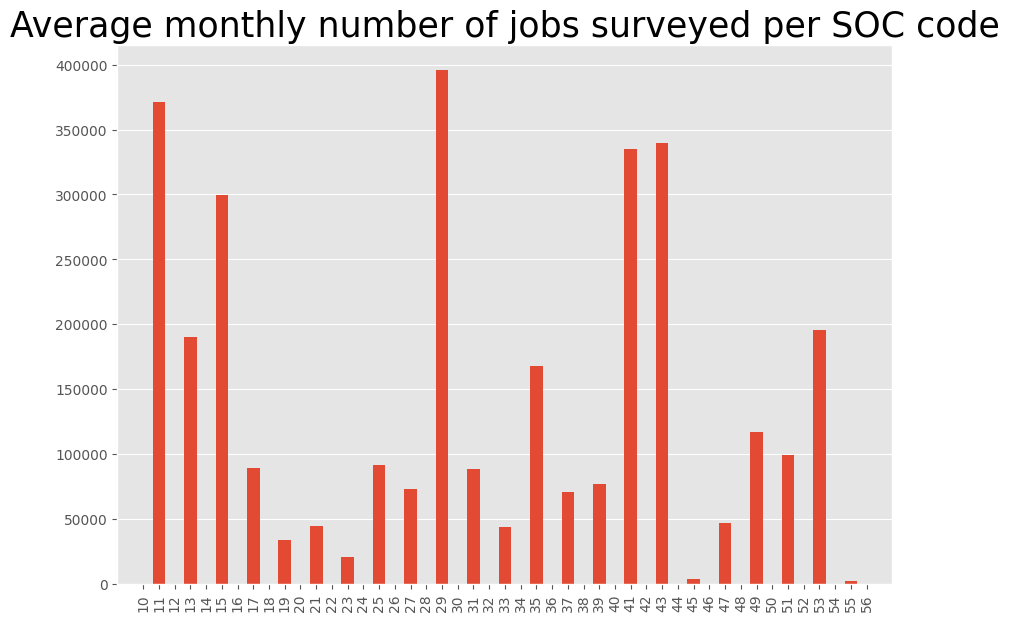

In [48]:
g = df.groupby(['us_soc_major_group_2digits']).agg({"n": ['mean']})
g.columns = ['mean']

rcParams['figure.figsize'] = 10, 7
plt.bar(g.index, g["mean"].values)   
plt.grid(axis = 'x')
plt.xticks(np.arange(10, 57, 1.0))
plt.xticks(rotation=90)
plt.title("Average monthly number of jobs surveyed per SOC code", fontsize = 25)
plt.show()

In [42]:
g.sort_values(by = "mean")

,mean
us_soc_major_group_2digits,
55,1780.176471
45,3321.745098
23,20535.627451
19,33518.607843
33,43553.725490
21,44445.352941
47,46664.686275
37,70302.568627
27,73057.235294


In [ ]:
np.mean(g["mean"].values)

In [ ]:
# we pool all the "percent" entries and plot a histogram:
# quoting from the Excel doc: 
# "Share of New Job Vacancy Postings which explicitly offer hybrid or fully-remote work"


corpus size, min, max:
(1173, 0.21, 36.12)
mean:
6.9
min tail:
[0.21, 0.21, 0.24, 0.25, 0.25, 0.25, 0.27, 0.27, 0.27, 0.3]
max tail:
[36.12, 35.66, 35.54, 35.47, 35.06, 34.71, 34.68, 34.58, 33.9, 33.74]



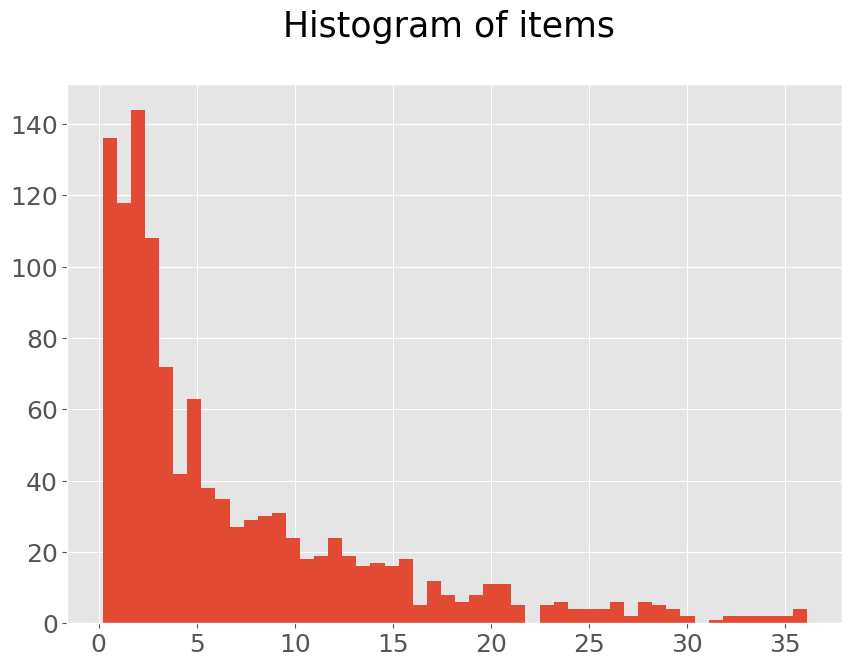

In [51]:
numeric_illustrator(df.percent.values)

In [52]:
df

,year,month,year_month,us_soc_major_group_2digits,us_soc_major_group_name,percent,n,measurement
0,2019,Jan,2019.000000,11,Management Occupations,5.07,322224,1 Month Average
1,2019,Feb,2019.083333,11,Management Occupations,5.43,305380,1 Month Average
2,2019,Mar,2019.166667,11,Management Occupations,4.94,321828,1 Month Average
3,2019,Apr,2019.250000,11,Management Occupations,5.59,292722,1 Month Average
4,2019,May,2019.333333,11,Management Occupations,4.87,340378,1 Month Average
...,...,...,...,...,...,...,...,...
1168,2022,Nov,2022.833333,55,Military Specific Occupations,6.52,1504,1 Month Average
1169,2022,Dec,2022.916667,55,Military Specific Occupations,8.07,892,1 Month Average
1170,2023,Jan,2023.000000,55,Military Specific Occupations,8.31,902,1 Month Average
1171,2023,Feb,2023.083333,55,Military Specific Occupations,8.06,980,1 Month Average


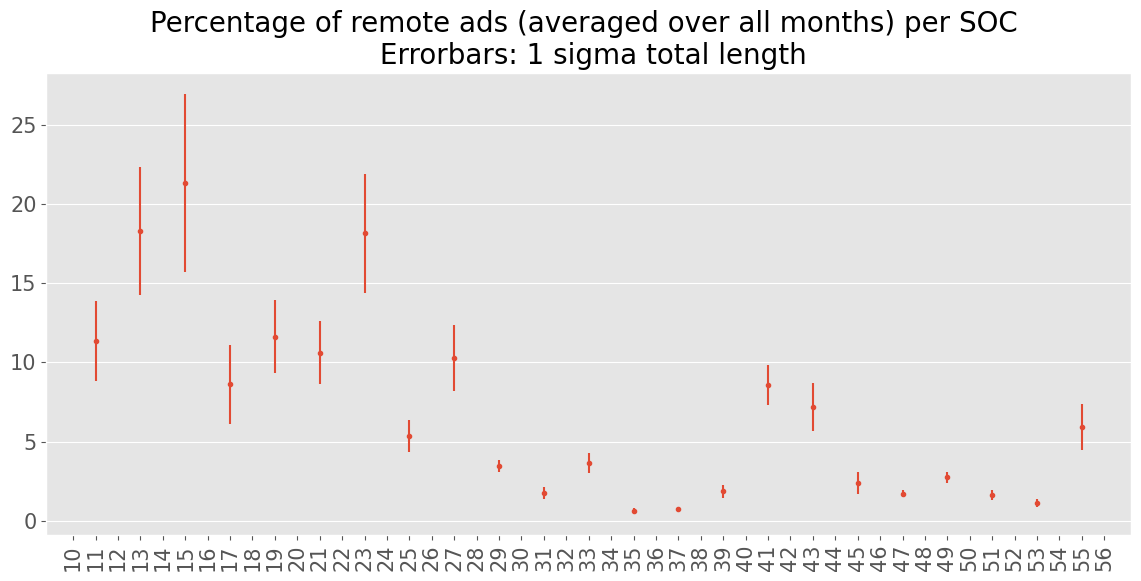

In [76]:
groups = df.groupby(['us_soc_major_group_2digits']).agg({"percent": ['mean', 'std']})
groups.columns = ['mean', 'std']
#groups.sort_values("mean", inplace = True)
#groups

rcParams['figure.figsize'] = 14, 6

x = groups['mean'].index
y = groups['mean'].values
e = groups['std'].values/2

plt.errorbar(x, y, e, linestyle='None', marker='.')
plt.grid(axis='x')                                        
plt.title("Percentage of remote ads (averaged over all months) per SOC \n Errorbars: 1 sigma total length", fontsize = 20)
plt.xticks(np.arange(10, 57, 1.0))
plt.xticks(rotation=90)
plt.tick_params(labelsize=15)
plt.show()
#plt.savefig('foo.png')

In [63]:
groups

,mean,std
us_soc_major_group_2digits,,
35,0.630588,0.360812
37,0.722745,0.252239
53,1.099020,0.504834
51,1.622745,0.617168
47,1.714314,0.471352
31,1.759216,0.785590
39,1.854510,0.841694
45,2.379608,1.350961
49,2.737059,0.652277


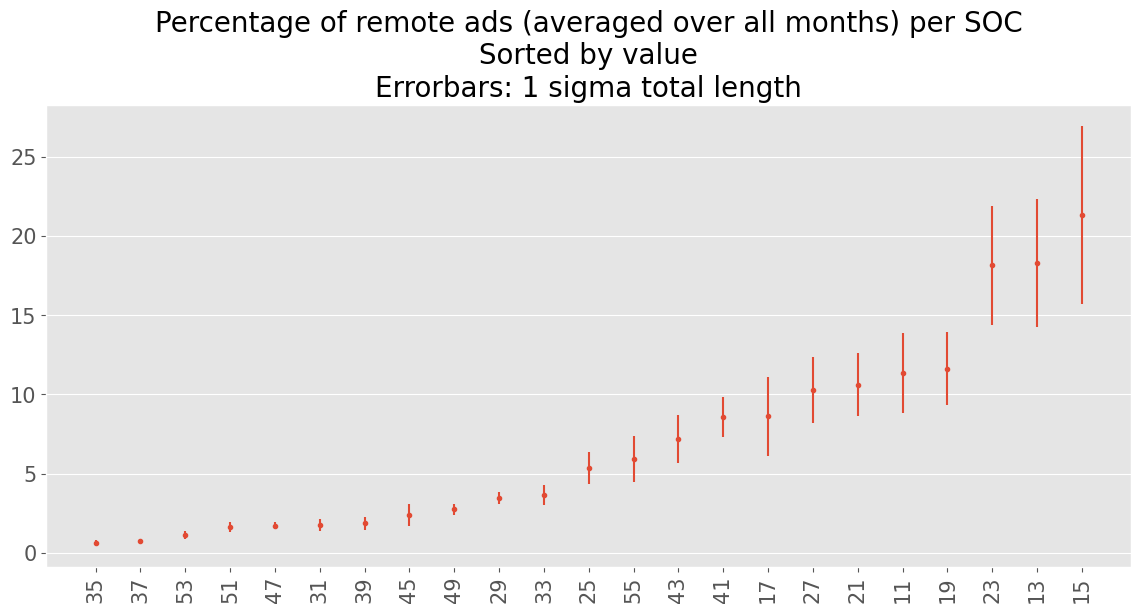

In [79]:
groups = df.groupby(['us_soc_major_group_2digits']).agg({"percent": ['mean', 'std']})
groups.columns = ['mean', 'std']
groups.sort_values("mean", inplace = True)
groups.index = groups.index.map(str)

rcParams['figure.figsize'] = 14, 6

x = groups['mean'].index
y = groups['mean'].values
e = groups['std'].values/2

plt.errorbar(x, y, e, linestyle='None', marker='.')
plt.grid(axis='x')
plt.title("Percentage of remote ads (averaged over all months) per SOC\n Sorted by value \nErrorbars: 1 sigma total length", fontsize = 20)
#plt.xticks(np.arange(10, 57, 1.0))
plt.xticks(rotation=90)
plt.tick_params(labelsize=15)
plt.show()
#plt.savefig('foo.png')

In [ ]:
# Food Preparation and Serving Related Occupations	35.
# Building and Grounds Cleaning and Maintenance Occupations	37.0
# Transportation and Material Moving Occupations	53.0

# Computer and Mathematical Occupations	15.0
# Business and Financial Operations Occupations	13.0

In [115]:
a = df.groupby(['us_soc_major_group_name']).agg({"us_soc_major_group_2digits": ['mean']})
a.columns = ["mean"]
a.sort_values("mean")

,mean
us_soc_major_group_name,
Management Occupations,11.0
Business and Financial Operations Occupations,13.0
Computer and Mathematical Occupations,15.0
Architecture and Engineering Occupations,17.0
"Life, Physical, and Social Science Occupations",19.0
Community and Social Service Occupations,21.0
Legal Occupations,23.0
"Education, Training, and Library Occupations",25.0
"Arts, Design, Entertainment, Sports, and Media Occupations",27.0


## Tranche 2:
## Monthly industry-level statistics (US, 2-digit NAICS codes)

In [ ]:
# we expect this mostly to be a copy-paste job

In [10]:
df = pd.read_csv('WFH_research/NAICS.csv')  

In [11]:
df

,year,month,year_month,naics_2_digit_code,naics_name,percent,n,measurement
0,2019,Jan,2019.000000,11,"Agriculture, Forestry, Fishing and Hunting",3.14,3380,1 Month Average
1,2019,Feb,2019.083333,11,"Agriculture, Forestry, Fishing and Hunting",2.96,3685,1 Month Average
2,2019,Mar,2019.166667,11,"Agriculture, Forestry, Fishing and Hunting",2.68,4884,1 Month Average
3,2019,Apr,2019.250000,11,"Agriculture, Forestry, Fishing and Hunting",5.83,4134,1 Month Average
4,2019,May,2019.333333,11,"Agriculture, Forestry, Fishing and Hunting",5.63,4975,1 Month Average
...,...,...,...,...,...,...,...,...
1015,2022,Nov,2022.833333,92,Public Administration,16.36,94358,1 Month Average
1016,2022,Dec,2022.916667,92,Public Administration,16.84,84636,1 Month Average
1017,2023,Jan,2023.000000,92,Public Administration,19.52,104383,1 Month Average
1018,2023,Feb,2023.083333,92,Public Administration,21.40,96233,1 Month Average


In [24]:
df.naics_2_digit_code.values[0]

'11'

In [12]:
df.naics_2_digit_code.value_counts().sort_index(ascending=True)

naics_2_digit_code
11       51
21       51
22       51
23       51
31-33    51
42       51
44-45    51
48-49    51
51       51
52       51
53       51
54       51
55       51
56       51
61       51
62       51
71       51
72       51
81       51
92       51
Name: count, dtype: int64

In [13]:
# 20 NAICS codes

In [14]:
# 4 years plus 3 months:
4*12+3

51

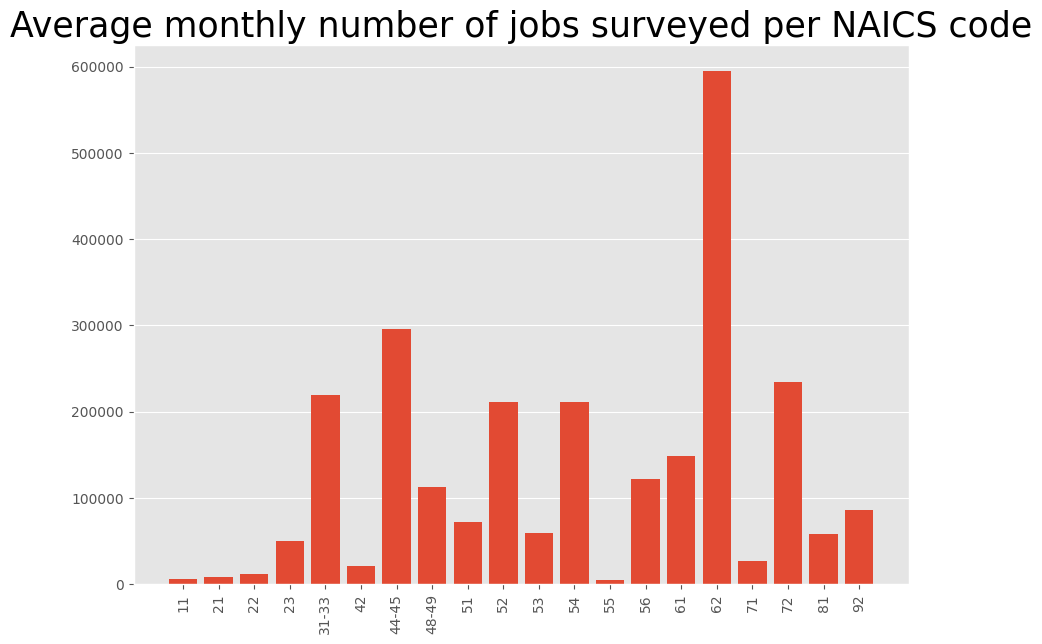

In [15]:
g = df.groupby(['naics_2_digit_code']).agg({"n": ['mean']})
g.columns = ['mean']

rcParams['figure.figsize'] = 10, 7
plt.bar(g.index, g["mean"].values)   
plt.grid(axis = 'x')
#plt.xticks(np.arange(10, 57, 1.0))
plt.xticks(rotation=90)
plt.title("Average monthly number of jobs surveyed per NAICS code", fontsize = 25)
plt.show()

In [16]:
g.sort_values(by = "mean")

,mean
naics_2_digit_code,
55,5210.901961
11,5468.137255
21,8463.156863
22,11819.215686
42,20816.019608
71,26420.274510
23,50476.215686
81,57701.431373
53,59850.196078


In [17]:
np.mean(g["mean"].values)

127829.48823529409

In [18]:
# we pool all the "percent" entries and plot a histogram:
# quoting from the Excel doc: 
# "Share of New Job Vacancy Postings which explicitly offer hybrid or fully-remote work"


corpus size, min, max:
(1020, 0.42, 30.67)
mean:
7.85
min tail:
[0.42, 0.43, 0.46, 0.47, 0.48, 0.49, 0.49, 0.52, 0.53, 0.53]
max tail:
[30.67, 28.39, 28.24, 28.14, 28.11, 27.94, 27.51, 27.49, 27.41, 27.28]



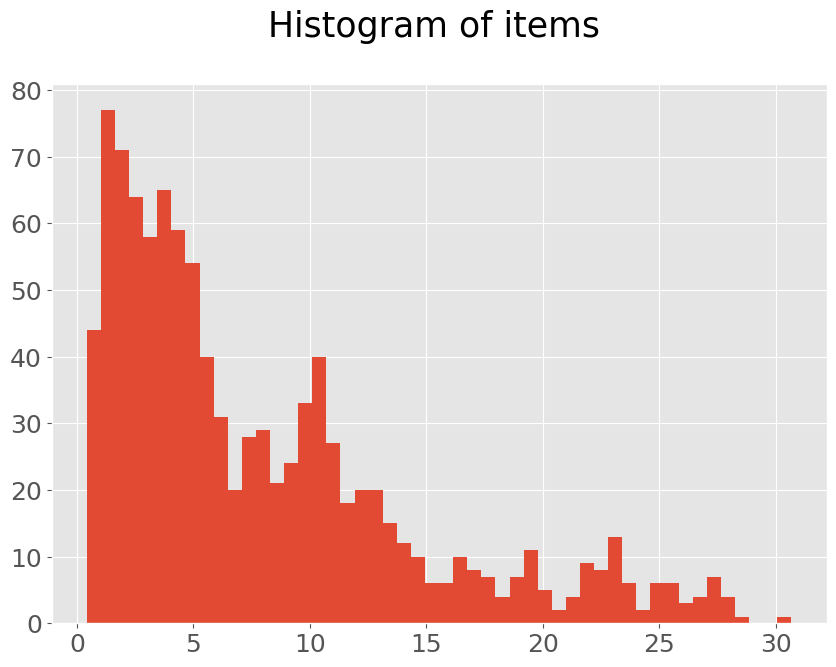

In [19]:
numeric_illustrator(df.percent.values)

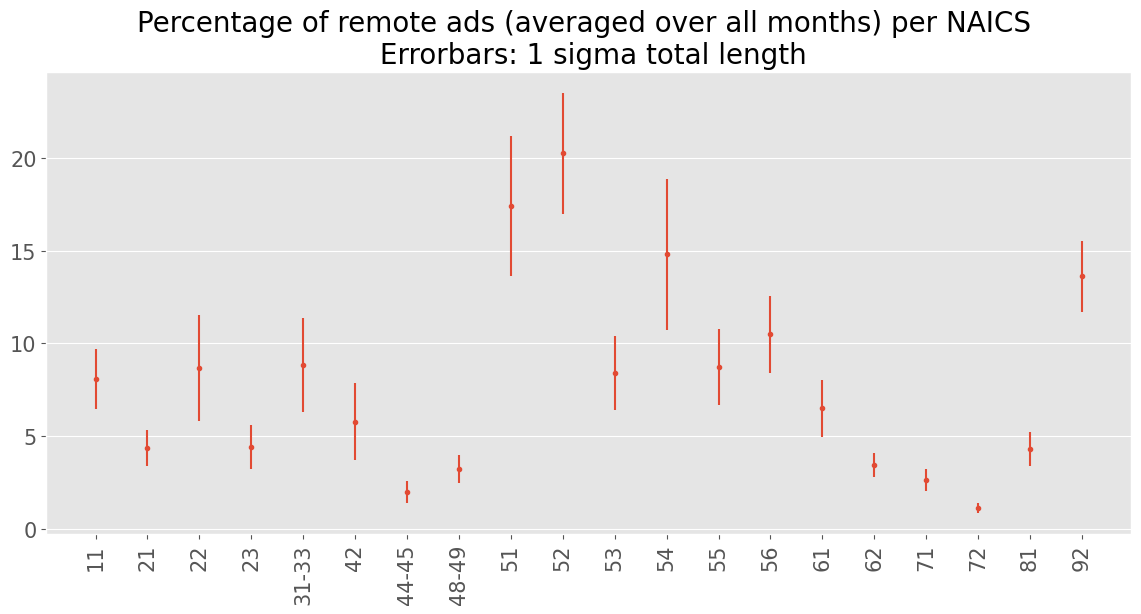

In [20]:
groups = df.groupby(['naics_2_digit_code']).agg({"percent": ['mean', 'std']})
groups.columns = ['mean', 'std']
#groups.sort_values("mean", inplace = True)
#groups

rcParams['figure.figsize'] = 14, 6

x = groups['mean'].index
y = groups['mean'].values
e = groups['std'].values/2

plt.errorbar(x, y, e, linestyle='None', marker='.')
plt.grid(axis='x')                                        
plt.title("Percentage of remote ads (averaged over all months) per NAICS \n Errorbars: 1 sigma total length", fontsize = 20)
#plt.xticks(np.arange(10, 57, 1.0))
plt.xticks(rotation=90)
plt.tick_params(labelsize=15)
plt.show()
#plt.savefig('foo.png')

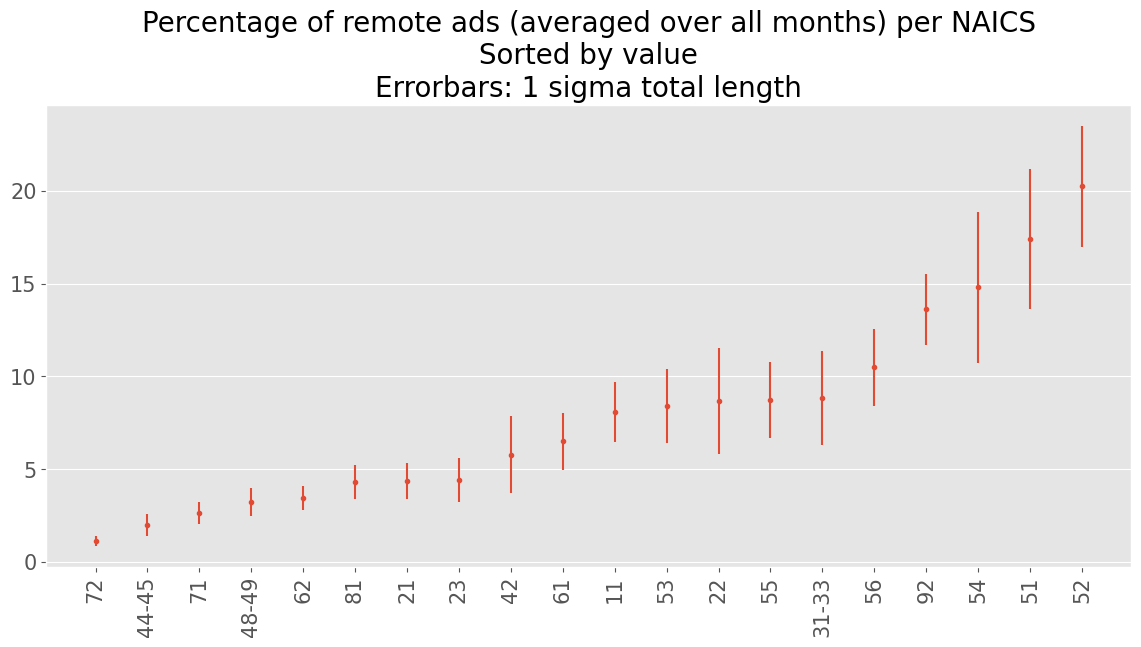

In [21]:
groups = df.groupby(['naics_2_digit_code']).agg({"percent": ['mean', 'std']})
groups.columns = ['mean', 'std']
groups.sort_values("mean", inplace = True)
#groups.index = groups.index.map(str)

rcParams['figure.figsize'] = 14, 6

x = groups['mean'].index
y = groups['mean'].values
e = groups['std'].values/2

plt.errorbar(x, y, e, linestyle='None', marker='.')
plt.grid(axis='x')
plt.title("Percentage of remote ads (averaged over all months) per NAICS\n Sorted by value \nErrorbars: 1 sigma total length", fontsize = 20)
#plt.xticks(np.arange(10, 57, 1.0))
plt.xticks(rotation=90)
plt.tick_params(labelsize=15)
plt.show()
#plt.savefig('foo.png')

In [22]:
# Accommodation and Food Services                                                72
# Retail Trade                                                                44-45

# Finance and Insurance                                                          52

In [23]:
df.groupby(['naics_name'])['naics_2_digit_code'].agg(lambda x: np.array(x)[0])

naics_name
Accommodation and Food Services                                                72
Administrative and Support and Waste Management and Remediation Services       56
Agriculture, Forestry, Fishing and Hunting                                     11
Arts, Entertainment, and Recreation                                            71
Construction                                                                   23
Educational Services                                                           61
Finance and Insurance                                                          52
Health Care and Social Assistance                                              62
Information                                                                    51
Management of Companies and Enterprises                                        55
Manufacturing                                                               31-33
Mining, Quarrying, and Oil and Gas Extraction                                  21
Other

In [163]:
# missing: we could have plotted time trends for individual industries

## Tranche 3
## City (US)

In [26]:
df = pd.read_csv('WFH_research/CITY.csv')  

In [30]:
df[100:130]

,year,month,year_month,city,region,division,state,percent,n,measurement
100,2023,Feb,2023.083333,New York,Northeast,Middle Atlantic,NY,18.98,60504,1 Month Average
101,2023,Mar,2023.166667,New York,Northeast,Middle Atlantic,NY,18.09,81780,1 Month Average
102,2019,Jan,2019.000000,Los Angeles,West,Pacific,CA,5.00,43192,1 Month Average
103,2019,Feb,2019.083333,Los Angeles,West,Pacific,CA,5.40,45238,1 Month Average
104,2019,Mar,2019.166667,Los Angeles,West,Pacific,CA,5.76,44079,1 Month Average
105,2019,Apr,2019.250000,Los Angeles,West,Pacific,CA,5.70,37244,1 Month Average
106,2019,May,2019.333333,Los Angeles,West,Pacific,CA,5.18,45205,1 Month Average
107,2019,Jun,2019.416667,Los Angeles,West,Pacific,CA,4.98,38635,1 Month Average
108,2019,Jul,2019.500000,Los Angeles,West,Pacific,CA,5.40,38654,1 Month Average
109,2019,Aug,2019.583333,Los Angeles,West,Pacific,CA,4.66,50076,1 Month Average


In [ ]:
# some cities have copies in multiple states!

In [35]:
df["city_state"] = df["city"] + df["state"]

In [193]:
df.city_state.value_counts()

city_state
UNITED STATES - NATIONAL-    51
GreenvilleNC                 51
HamiltonOH                   51
MansfieldTX                  51
SouthlakeTX                  51
                             ..
GreeleyCO                    51
NewarkDE                     51
BrentwoodTN                  51
MilpitasCA                   51
TauntonMA                    51
Name: count, Length: 947, dtype: int64

In [202]:
len(df.city_state.value_counts())-1

946

In [ ]:
# we seem to be seeing 946 cities

In [ ]:
# the below needs to be redone with City-State
# question: should the aggregate remoteability of a city affect its residuals?
#   or is that all explainable simply via the sector/industry remoteability

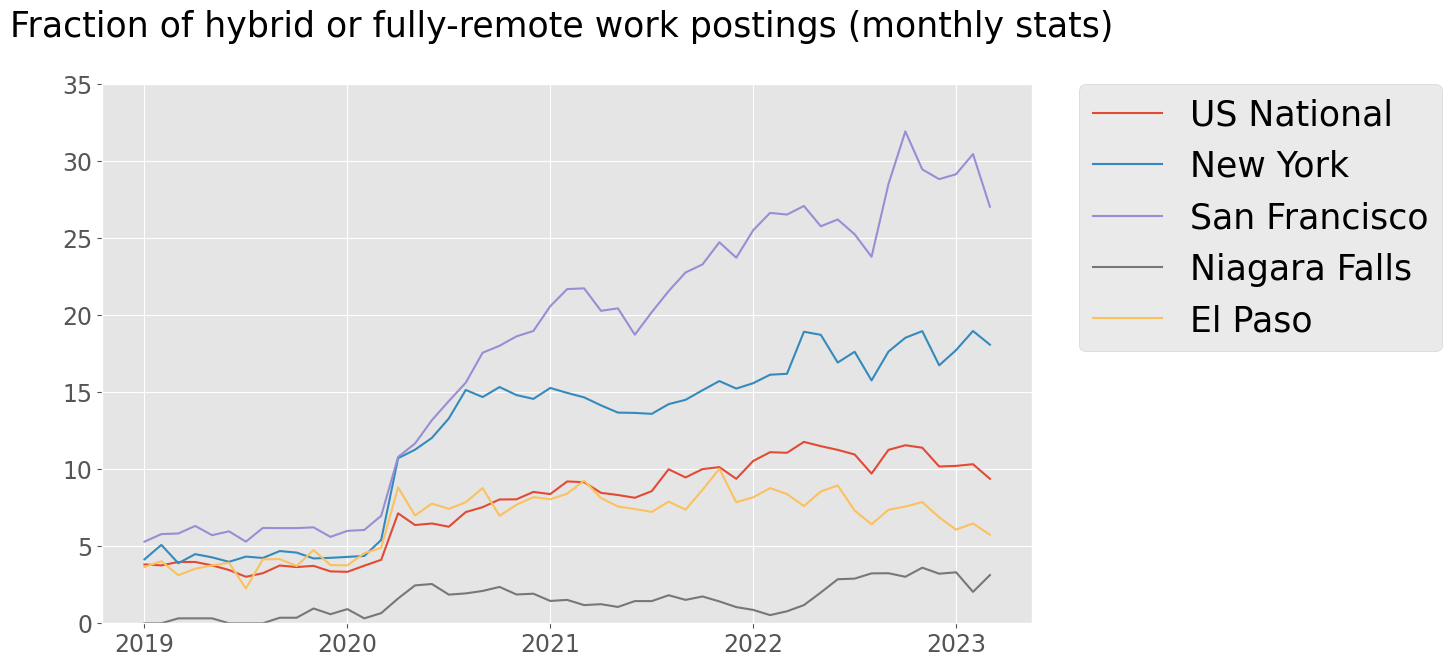

In [33]:
rcParams['figure.figsize'] = 12, 7


df2 = df.loc[df["city"] == "UNITED STATES - NATIONAL"]
plt.plot(df2.year_month.values, df2.percent.values, label = "US National")   

df2 = df.loc[df["city"] == "New York"]
plt.plot(df2.year_month.values, df2.percent.values, label = "New York")   

df2 = df.loc[df["city"] == "San Francisco"]
plt.plot(df2.year_month.values, df2.percent.values, label = "San Francisco")   

df2 = df.loc[df["city"] == "Niagara Falls"]
plt.plot(df2.year_month.values, df2.percent.values, label = "Niagara Falls")   



df2 = df.loc[df["city"] == "El Paso"]
plt.plot(df2.year_month.values, df2.percent.values, label = "El Paso")   

plt.title("Fraction of hybrid or fully-remote work postings (monthly stats) \n", fontsize = 25)
plt.tick_params(labelsize=17)
#plt.xticks(rotation=0)
axes = plt.gca()
axes.set_ylim([0,35])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 25, borderaxespad=0.)
#plt.tick_params(axias='x', which='both', bottom=False, top=False, labelbottom=False)
plt.show()

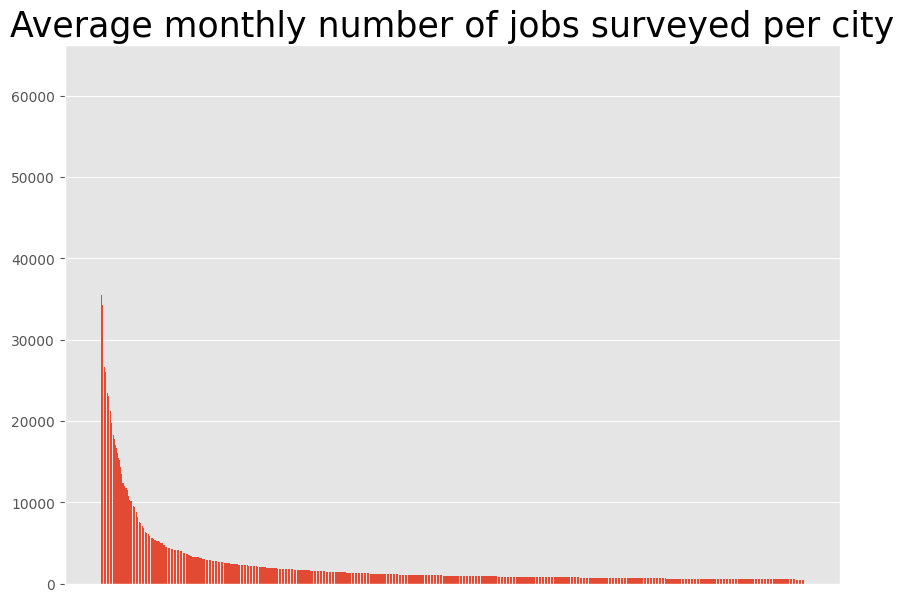

In [38]:
g = df.loc[df["city"] != "UNITED STATES - NATIONAL"].groupby(['city_state']).agg({"n": ['mean']})
g.columns = ['mean']
g.sort_values("mean", inplace = True, ascending = False)
rcParams['figure.figsize'] = 10, 7
plt.bar(g.index, g["mean"].values)   
plt.grid(axis = 'x')
#plt.xticks(np.arange(10, 57, 1.0))
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xticks(rotation=90)
plt.title("Average monthly number of jobs surveyed per city", fontsize = 25)
plt.show()

In [40]:
g[:20]

,mean
city_state,
New YorkNY,63164.372549
Los AngelesCA,40003.098039
HoustonTX,35444.784314
ChicagoIL,34236.215686
AtlantaGA,29788.274510
DallasTX,28265.352941
San FranciscoCA,26589.901961
PhoenixAZ,26045.196078
San DiegoCA,26017.549020


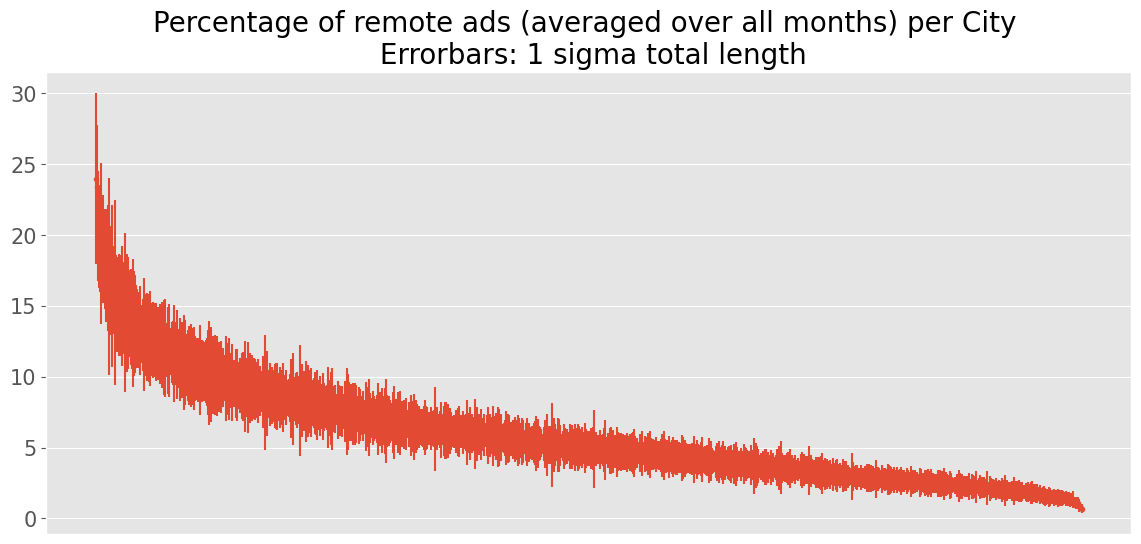

In [41]:
groups = df.loc[df["city"] != "UNITED STATES - NATIONAL"].groupby(['city_state']).agg({"percent": ['mean', 'std']})
groups.columns = ['mean', 'std']
groups.sort_values("mean", inplace = True, ascending = False)
#groups

rcParams['figure.figsize'] = 14, 6

x = groups['mean'].index
y = groups['mean'].values
e = groups['std'].values/2

plt.errorbar(x, y, e, linestyle='None', marker='.')
plt.grid(axis='x')                                        
plt.title("Percentage of remote ads (averaged over all months) per City \n Errorbars: 1 sigma total length", fontsize = 20)
#plt.xticks(np.arange(10, 57, 1.0))
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xticks(rotation=90)
plt.tick_params(labelsize=15)
plt.show()
#plt.savefig('foo.png')

In [42]:
# most remote-working cities
groups[:40]

,mean,std
city_state,,
AugustaME,23.968824,12.071741
DoverDE,23.383333,8.763405
OlympiaWA,20.636863,7.750068
TrentonNJ,19.869804,7.261501
Eden PrairieMN,19.684510,7.478476
LansingMI,19.393725,11.347671
Jefferson CityMO,19.198431,4.658019
WashingtonDC,19.005882,7.579556
FrankfortKY,18.716275,6.179823


In [ ]:
# is this related to population?